# Regularization
We are going to look at a dataset on baseball.

## Imports

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler


## Read in Data

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
url = "http://ddc-datascience.s3-website-us-west-1.amazonaws.com/Hitters.csv"
hits = pd.read_csv( url )
hits.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [ ]:
hits.shape

(322, 20)

In [ ]:
hits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [ ]:
hits.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AtBat,322.0,380.928571,153.404981,16.0,255.25,379.5,512.00,687.0
Hits,322.0,101.024845,46.454741,1.0,64.00,96.0,137.00,238.0
HmRun,322.0,10.770186,8.709037,0.0,4.00,8.0,16.00,40.0
Runs,322.0,50.909938,26.024095,0.0,30.25,48.0,69.00,130.0
RBI,322.0,48.027950,26.166895,0.0,28.00,44.0,64.75,121.0
Walks,322.0,38.742236,21.639327,0.0,22.00,35.0,53.00,105.0
Years,322.0,7.444099,4.926087,1.0,4.00,6.0,11.00,24.0
CAtBat,322.0,2648.683230,2324.205870,19.0,816.75,1928.0,3924.25,14053.0
CHits,322.0,717.571429,654.472627,4.0,209.00,508.0,1059.25,4256.0
CHmRun,322.0,69.490683,86.266061,0.0,14.00,37.5,90.00,548.0


## Data Cleaning

In [ ]:
# Check for NAs
hits_clean = hits.copy()
hits_clean.isnull().sum()*10

AtBat          0
Hits           0
HmRun          0
Runs           0
RBI            0
Walks          0
Years          0
CAtBat         0
CHits          0
CHmRun         0
CRuns          0
CRBI           0
CWalks         0
League         0
Division       0
PutOuts        0
Assists        0
Errors         0
Salary       590
NewLeague      0
dtype: int64

In [ ]:
agoobi = hits_clean.isnull().sum()
agoobi

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [ ]:
filter = agoobi > 0
filter

AtBat        False
Hits         False
HmRun        False
Runs         False
RBI          False
Walks        False
Years        False
CAtBat       False
CHits        False
CHmRun       False
CRuns        False
CRBI         False
CWalks       False
League       False
Division     False
PutOuts      False
Assists      False
Errors       False
Salary        True
NewLeague    False
dtype: bool

In [ ]:
agoobi[ filter ]/(hits_clean.shape[0])*100

Salary    18.322981
dtype: float64

All the NAs are in the Salary column. Since the salary column is our response, it is probably best to remove rows that contain NAs.

In [ ]:
# Remove rows with NAs
hits_clean.dropna(axis = 0, inplace = True, subset = "Salary")

In [ ]:
pd.DataFrame.dropna?

In [ ]:
# Confirm they were removed
hits_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64

In [ ]:
hits_clean.isnull().sum()*10

AtBat        0
Hits         0
HmRun        0
Runs         0
RBI          0
Walks        0
Years        0
CAtBat       0
CHits        0
CHmRun       0
CRuns        0
CRBI         0
CWalks       0
League       0
Division     0
PutOuts      0
Assists      0
Errors       0
Salary       0
NewLeague    0
dtype: int64

In [ ]:
agoobi = hits_clean.isnull().sum()
filter = agoobi > 0
agoobi[ filter ]/(hits_clean.shape[0])*100

Series([], dtype: float64)

NAs were successfully removed. Now we notice that some of the columns are object type. Let's take a look at those.

In [ ]:
hits_clean.dtypes.value_counts()

int64      16
object      3
float64     1
dtype: int64

In [ ]:
hits_clean.dtypes.sort_values()

AtBat          int64
Errors         int64
Assists        int64
PutOuts        int64
CWalks         int64
CRBI           int64
CRuns          int64
CHits          int64
CHmRun         int64
Years          int64
Walks          int64
RBI            int64
Runs           int64
HmRun          int64
Hits           int64
CAtBat         int64
Salary       float64
League        object
Division      object
NewLeague     object
dtype: object

In [ ]:
# League column
hits_clean['League'].value_counts()

A    139
N    124
Name: League, dtype: int64

In [ ]:
# Since it only has two values, we can label encode
hits_clean['League'] = hits_clean['League'].replace({'A': 1, 'N': 0})

In [ ]:
hits_clean['League'].value_counts()

1    139
0    124
Name: League, dtype: int64

In [ ]:
# Division column
hits_clean['Division'].value_counts()

W    134
E    129
Name: Division, dtype: int64

In [ ]:
# Since it only has two values, we can label encode
hits_clean['Division'] = hits_clean['Division'].replace({'W': 1, 'E': 0})

In [ ]:
hits_clean['Division'].value_counts()

1    134
0    129
Name: Division, dtype: int64

In [ ]:
# New League column
hits_clean['NewLeague'].value_counts()

A    141
N    122
Name: NewLeague, dtype: int64

In [ ]:
# Since it only has two values, we can label encode
hits_clean['NewLeague'] = hits_clean['NewLeague'].replace({'A': 1, 'N': 0})

In [ ]:
hits_clean['NewLeague'].value_counts()

1    141
0    122
Name: NewLeague, dtype: int64

In [ ]:
hits_clean.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,0,1,632,43,10,475.0,0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,1,1,880,82,14,480.0,1
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,0,0,200,11,3,500.0,0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,0,0,805,40,4,91.5,0
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,1,1,282,421,25,750.0,1


In [ ]:
hits_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    int64  
 14  Division   263 non-null    int64  
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    int64  
dtypes: float64

In [ ]:
hits_clean.dtypes.sort_values()

AtBat          int64
Errors         int64
Assists        int64
PutOuts        int64
Division       int64
League         int64
CWalks         int64
CRBI           int64
CRuns          int64
CHmRun         int64
CHits          int64
CAtBat         int64
Years          int64
Walks          int64
RBI            int64
Runs           int64
HmRun          int64
Hits           int64
NewLeague      int64
Salary       float64
dtype: object

## EDA

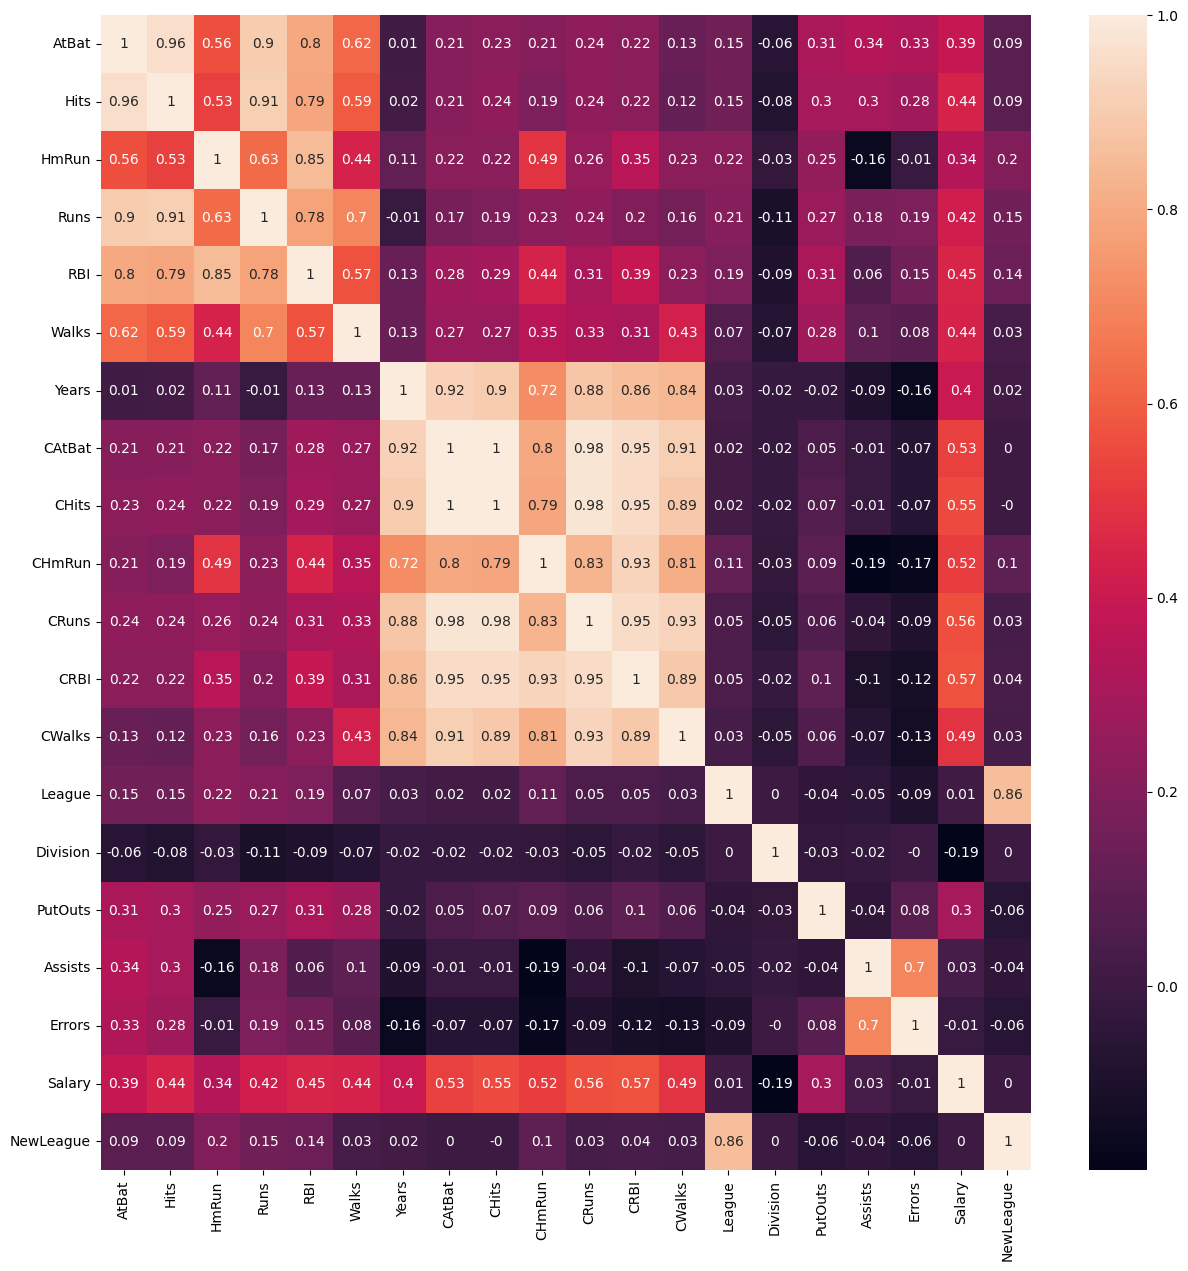

In [ ]:
# Let's take a look at a correlation plot
plt.figure(figsize=(15,15))
correlation_matrix = hits_clean.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True) ;

Create a list of the most highly correlated.

In [ ]:
corr_series = correlation_matrix.abs().unstack()
lt_df = (
  corr_series[ ( 0.92 < corr_series ) & ( corr_series < 1 )]
    .sort_values( ascending=False)
    .drop_duplicates()
    .to_frame()
    .rename( columns={0:"A"} )
    .sort_values( by = "A", ascending=False )
    .reset_index()
)
high_corrs = pd.concat([lt_df["level_0"], lt_df["level_1"]]).value_counts().index
high_corrs


Index(['CAtBat', 'CRBI', 'AtBat', 'CHmRun', 'CRuns', 'Hits'], dtype='object')

Almost the same result using a lower triangle.

In [ ]:
lower_triangle = np.tril(abs(correlation_matrix)+1.1, k=-1)-1.1
lower_triangle_df  = pd.DataFrame(lower_triangle, index=correlation_matrix.index, columns=correlation_matrix.columns)
lt_df = (
  lower_triangle_df
    .unstack()
    .to_frame()
    .rename( columns={0:"A"} )
    .query( "A > 0.92")
    .sort_values( by = "A", ascending=False )
    .reset_index()
)
high_corrs = pd.concat([lt_df["level_0"], lt_df["level_1"]]).value_counts().index
high_corrs


Index(['CRuns', 'CRBI', 'CAtBat', 'CHits', 'AtBat', 'CHmRun', 'Hits',
       'CWalks'],
      dtype='object')

Plot the lower triangle.

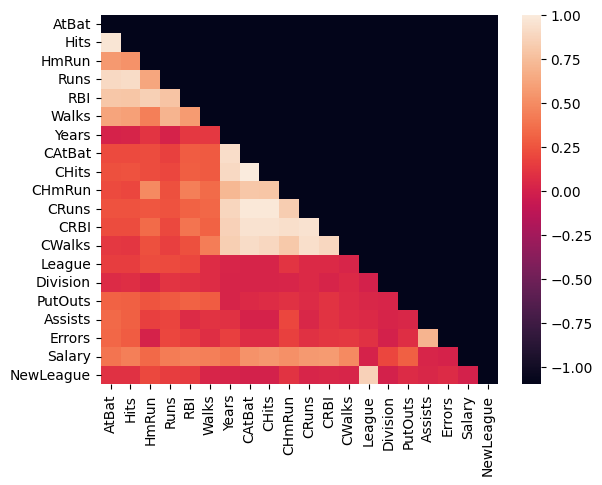

In [ ]:
# plt.figure(figsize=(15,15))
sns.heatmap(data=lower_triangle_df, annot=False) ;

Several of the predictors are highly correlated:
- CAtBat, CHits, CRuns, CRBI, CWalks
- AtBat, Hits, Runs

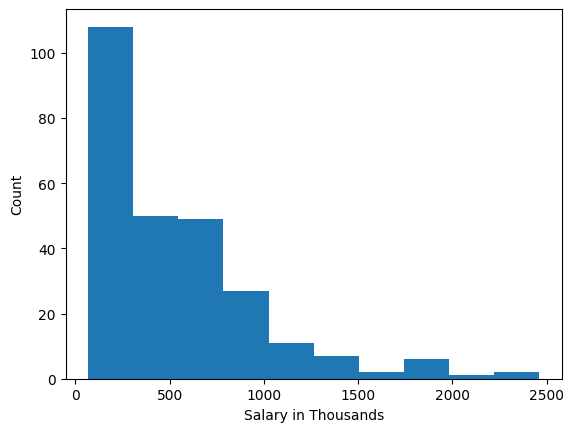

In [ ]:
# Let's look at the distribution of salaries
plt.hist(hits_clean['Salary'])
plt.xlabel('Salary in Thousands')
plt.ylabel("Count")
plt.savefig('test.png')

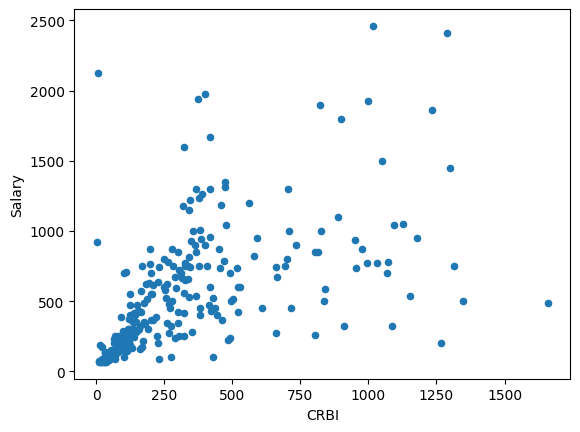

In [ ]:
# Let's look at a scatterplot of CRBI and Salary
hits_clean.plot('CRBI', 'Salary', kind = 'scatter') ;

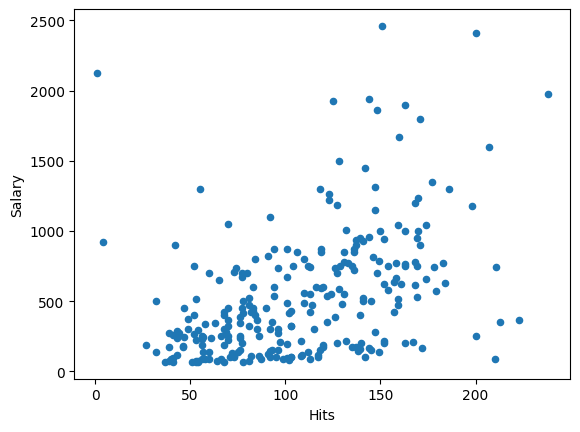

In [ ]:
# Let's look at a scatterplot of hits and salary
hits_clean.plot('Hits', 'Salary', kind = 'scatter') ;

## Linear Regression
We will first fit a multiple linear regression model. We are going to drop some of the highly correlated predictors.

In [ ]:
# First we will break up our data into training and testing sets
X = hits_clean.drop(['CRuns', 'CHmRun', 'CHits', 'CAtBat', 'CWalks', 'Runs', 'AtBat','Salary'], axis = 1).copy()
y = hits_clean['Salary']

# normalize the features
scaler = StandardScaler()
scaler.fit_transform(X)


array([[-0.59567545, -0.5285512 , -0.52206292, ..., -0.52319133,
         0.21335208, -1.07505242],
       [ 0.49225957,  0.72996619,  0.79405962, ..., -0.25386267,
         0.81996395,  0.9301872 ],
       [ 0.73648988,  0.95878753,  1.02631654, ..., -0.74417894,
        -0.84821868, -1.07505242],
       ...,
       [ 0.40344855, -0.98619389, -0.32851549, ..., -0.03978092,
        -0.24160682,  0.9301872 ],
       [ 0.80309815, -0.29972986,  0.32954578, ...,  0.08452461,
         0.51665801,  0.9301872 ],
       [ 1.38036979, -0.29972986, -0.289806  , ..., -0.79251998,
        -0.84821868,  0.9301872 ]])

In [ ]:
X.columns

Index(['Hits', 'HmRun', 'RBI', 'Walks', 'Years', 'CRBI', 'League', 'Division',
       'PutOuts', 'Assists', 'Errors', 'NewLeague'],
      dtype='object')

In [ ]:
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=5)

In [ ]:
X.head()

,Hits,HmRun,RBI,Walks,Years,CRBI,League,Division,PutOuts,Assists,Errors,NewLeague
1,81,7,38,39,14,414,0,1,632,43,10,0
2,130,18,72,76,3,266,1,1,880,82,14,1
3,141,20,78,37,11,838,0,0,200,11,3,0
4,87,10,42,30,2,46,0,0,805,40,4,0
5,169,4,51,35,11,336,1,1,282,421,25,1


In [ ]:
X_scaled.head()

,Hits,HmRun,RBI,Walks,Years,CRBI,League,Division,PutOuts,Assists,Errors,NewLeague
0,-0.595675,-0.528551,-0.522063,-0.097527,1.397893,0.258966,-1.058758,0.981166,1.221499,-0.523191,0.213352,-1.075052
1,0.492260,0.729966,0.794060,1.609373,-0.901200,-0.199590,0.944503,0.981166,2.109109,-0.253863,0.819964,0.930187
2,0.736490,0.958788,1.026317,-0.189792,0.770868,1.572666,-1.058758,-1.019196,-0.324661,-0.744179,-0.848219,-1.075052
3,-0.462459,-0.185319,-0.367225,-0.512719,-1.110209,-0.881228,-1.058758,-1.019196,1.840678,-0.543909,-0.696566,-1.075052
4,1.358167,-0.871783,-0.018840,-0.282057,0.770868,0.017294,0.944503,0.981166,-0.031177,2.087225,2.488147,0.930187


In [ ]:
# Fit a linear model using Sklearn
model = LinearRegression()
my_fit_lr = model.fit(X_train, y_train)

In [ ]:
# Create a data frame with the results from the linear regression models
model_results = pd.DataFrame()
model_results['Predictor'] = X_train.columns
model_results['Linear'] = my_fit_lr.coef_
model_results.sort_values(by=['Linear'],inplace=True, ascending=False)
model_results


,Predictor,Linear
5,CRBI,317.783605
0,Hits,159.402063
3,Walks,83.813617
8,PutOuts,74.362630
11,NewLeague,46.423897
1,HmRun,4.333290
9,Assists,-8.179403
10,Errors,-17.209338
7,Division,-35.467649
6,League,-62.486797


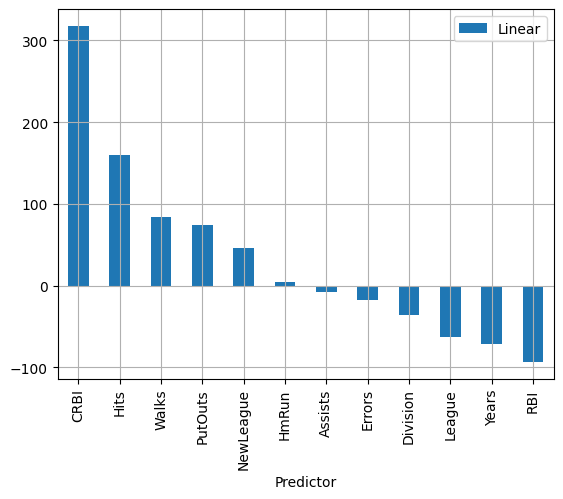

In [ ]:
# We can even plot the coefficients if we want to!
model_results.plot(x = 'Predictor', y = 'Linear', kind = 'bar')
plt.grid()


In [ ]:
# Calculate CV RMSE
results = cross_val_score(
    model,
    X_scaled,
    y,
    scoring='neg_root_mean_squared_error',
    cv = 10
    )
rmse = abs(results.mean())
print(f"CV RMSE: {rmse}")

CV RMSE: 333.5875915300091


:This is showing that we have a RMSE of about $333,587.

**NOTE**: We did not do any residual analysis in this example, although it is an important part of checking the assumptions of a linear regression model. Please refer back to the linear regression lecture for an example of how to check residuals.

## Regularization - Ridge Regression

In [ ]:
# Train the model
my_fit_rr = Ridge(alpha = 1) # Arbitrarily choosing alpha = 1
my_fit_rr.fit(X_train, y_train) ;

In [ ]:
# Calculate RMSE
y_pred = my_fit_rr.predict(X_test)
rmse = np.sqrt(np.mean(np.square(y_test - y_pred)))
print(f"RMSE: {rmse}")

RMSE: 456.73437123294104


Let's try looking at different values of $\alpha$.

In [ ]:
# Specify values of alpha we want to try
alph = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1e-1, 1, 2, 3, 4, 5, 10, 20, 30, 50]

# Create empty list to hold results
results_alpha = []

for i in alph:
  # Train the model
  my_fit_rr = Ridge(alpha = i) # Looping through alpha
  my_fit_rr.fit(X_train, y_train)

  # Calculate CV RMSE
  results = cross_val_score(
      my_fit_rr,
      X_scaled,
      y,
      scoring='neg_root_mean_squared_error',
      cv = 10
      )
  rmse = abs(results.mean())
  results_alpha.append(rmse)

results_df = pd.DataFrame({'Alpha': alph, 'RMSE': results_alpha})
print(results_df.sort_values(by=['RMSE']))

           Alpha        RMSE
13  2.000000e+01  330.843245
14  3.000000e+01  330.850515
15  5.000000e+01  331.278127
12  1.000000e+01  331.284307
11  5.000000e+00  331.981569
10  4.000000e+00  332.202221
9   3.000000e+00  332.463185
8   2.000000e+00  332.773146
7   1.000000e+00  333.143181
6   1.000000e-01  333.539312
5   1.000000e-02  333.582722
4   1.000000e-03  333.587104
3   1.000000e-04  333.587543
2   1.000000e-08  333.587592
1   1.000000e-10  333.587592
0   1.000000e-15  333.587592


It looks like 20 gives us the smallest RMSE.

In [ ]:
# Retrain the model w/ alpha = 20
my_fit_rr = Ridge(alpha = 20)
my_fit_rr.fit(X_train, y_train)

# Calculate CV RMSE
results = cross_val_score(my_fit_rr, X_scaled, y, scoring='neg_root_mean_squared_error', cv = 10)
rmse = abs(results.mean())
print(f"CV RMSE: {rmse}")

CV RMSE: 330.84324517956395


In [ ]:
# Add ridge regression results to data frame we created earlier
model_results['Ridge'] = my_fit_rr.coef_

In [ ]:
model_results

,Predictor,Linear,Ridge
5,CRBI,317.783605,116.053612
0,Hits,159.402063,-9.463886
3,Walks,83.813617,-14.569490
8,PutOuts,74.362630,84.991926
11,NewLeague,46.423897,13.026892
1,HmRun,4.333290,205.867995
9,Assists,-8.179403,-42.970985
10,Errors,-17.209338,-32.322113
7,Division,-35.467649,74.838811
6,League,-62.486797,-4.650707


## Regularization - Lasso Regression


In [ ]:
# Specify values of alpha we want to try
alph = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1e-1, 1, 2, 3, 4, 5, 10, 20, 30, 50]

# Create empty list to hold results
results_alpha = []

for i in alph:
  # Train the model
  my_fit_lasso = Lasso(alpha = i, tol = .01, max_iter=100_000) # Looping through alpha
  my_fit_lasso.fit(X_train, y_train)

  # Calculate CV RMSE
  results = cross_val_score(
      my_fit_lasso,
      X_scaled,
      y,
      scoring='neg_root_mean_squared_error',
      cv = 10
  )
  rmse = abs(results.mean())
  results_alpha.append(rmse)

results_df = pd.DataFrame({'Alpha': alph, 'RMSE': results_alpha})
print(results_df.sort_values(by=['RMSE']))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.892e+06, tolerance: 4.305e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.227e+07, tolerance: 5.077e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.141e+07, tolerance: 4.958e

           Alpha        RMSE
13  2.000000e+01  327.052293
12  1.000000e+01  327.500418
14  3.000000e+01  328.881910
11  5.000000e+00  329.468774
10  4.000000e+00  330.282877
9   3.000000e+00  331.243270
8   2.000000e+00  332.044694
7   1.000000e+00  332.505718
6   1.000000e-01  333.469216
5   1.000000e-02  333.575633
4   1.000000e-03  333.586392
3   1.000000e-04  333.587471
2   1.000000e-08  333.587592
1   1.000000e-10  333.587592
0   1.000000e-15  333.587592
15  5.000000e+01  336.127351


In [ ]:
# Train the model
my_fit_lasso = Lasso(alpha = 20, tol = .01, max_iter=1000000)
my_fit_lasso.fit(X_train, y_train)

# Calculate CV RMSE
results = cross_val_score(my_fit_lasso, X_scaled, y, scoring='neg_root_mean_squared_error', cv = 10)
rmse = abs(results.mean())
print(f"CV RMSE: {rmse}")

CV RMSE: 327.052293126054


In [ ]:
# Add Lasso results to the data frame we created before
model_results['Lasso'] = my_fit_lasso.coef_

In [ ]:
model_results

,Predictor,Linear,Ridge,Lasso
5,CRBI,317.783605,116.053612,87.227266
0,Hits,159.402063,-9.463886,-0.000000
3,Walks,83.813617,-14.569490,-0.000000
8,PutOuts,74.362630,84.991926,74.329459
11,NewLeague,46.423897,13.026892,0.000000
1,HmRun,4.333290,205.867995,220.987071
9,Assists,-8.179403,-42.970985,-3.107642
10,Errors,-17.209338,-32.322113,-17.448902
7,Division,-35.467649,74.838811,65.674623
6,League,-62.486797,-4.650707,-0.000000


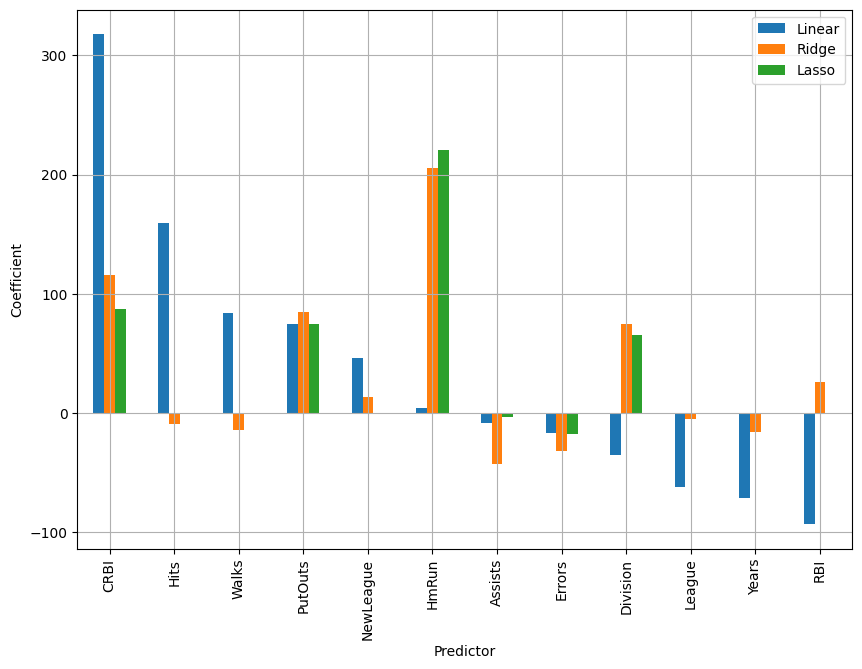

In [ ]:
# Plot results
fig, ax = plt.subplots(1,1, figsize = (10,7))
model_results.plot(x = 'Predictor', kind = 'bar', ax = ax)
ax.set_ylabel('Coefficient')
plt.grid()

After performing regularization, we were able to reduce our RMSE from
\$333,587 with linear regression to
\$330,843 with Ridge regression to
\$327,052 with Lasso regression. For all models, CRBI and HmRun seem to be the most important predictors of salary.